# Importing Libraries

In [ ]:
# Imports Libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Initialising Data

In [ ]:
featureNames = np.array(['Feature 1', 'Feature 2', 'Feature 3'])

# Initialiases the data
xData = np.array([[-1, -1, 2], [-2, -1, 4], [-3, -2, 1], [1, 1, 3], [2, 1, -2], [3, 2, -4]])
yData = np.array([98, 173, 279, 422, 588, 716]).reshape(-1, 1)

# Scales the data
xScaler = StandardScaler().fit(xData)
xData = xScaler.transform(xData)
xData = xData.T

yScaler = StandardScaler().fit(yData)
yData = yScaler.transform(yData)[:,0]



---


# Linear

In [ ]:
# Defines the linear function
def linear(xData, m1, m2, m3, c):
  return m1 * xData[0] + m2 * xData[1] + m3 * xData[2] + c

MODEL_TYPE = linear

# Exponential

In [ ]:
# Defines the exponential function
def exponential(xData, m1, m2, m3, a):
  return a * np.exp(m1 * xData[0] + m2 * xData[1] + m3 * xData[2])

MODEL_TYPE = exponential



---


# General

In [ ]:
# Calculates the paramaters of the model
popt, pcov = curve_fit(MODEL_TYPE, xData, yData, maxfev = 10000)
coeffs, c = popt[:-1], popt[-1]
absCoeffs = np.abs(coeffs)

# Creates function for model with the found parameters
model = lambda xData: MODEL_TYPE(xData, *popt)

# Calculates the r^2 score
rSquared = r2_score(yData, model(xData))

print(f'R^2 value: {rSquared}')
print(f'Coeffs: {coeffs}')
print(f'Intercept: {c}')

R^2 value: 0.9432296253356971
Coeffs: [-1.54944229  1.91873438 -0.74153063]
Intercept: -8.65245786130231e-09


# Plotting Data

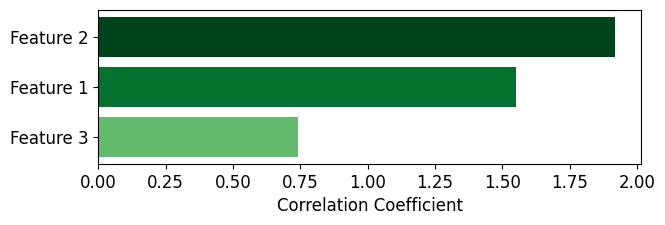

In [ ]:
# Creates indices of sorted importances
indices = np.argsort(absCoeffs)

plt.figure(figsize=(7,2))
cMap = plt.get_cmap('Greens')

# Plots the bar graph
plt.barh(range(len(indices)), absCoeffs[indices],
         color=cMap(absCoeffs[indices] * 3 / 4 / np.max(absCoeffs) + 0.25))

plt.yticks(range(len(indices)), featureNames[indices], fontsize=12)

plt.xticks(fontsize=12)
plt.xlabel('Correlation Coefficient', fontsize=12)

plt.show()